# Invert Eliassen balanced vortex model
**08 August 2022 by MiniUFO**

---
[TOC]

---


## 1. Introduction
Eliassen's [pioneering work in 1951](https://ui.adsabs.harvard.edu/abs/1951ApNr....5...19E/abstract) has proposed a balanced vortex model, describing a slowly-evolving axisymmetric polar vortex in response to various kinds of forcings:
>$$\frac{\partial}{\partial p}\left(A\frac{\partial \psi}{\partial p}+B\frac{\partial \psi}{\partial y}\right)+\frac{\partial}{\partial y}\left(B\frac{\partial \psi}{\partial p}+C\frac{\partial \psi}{\partial y}\right)=F\tag{1}$$

Here $\psi$ is the streamfunction in the $y-p$ plane (a.k.a meridional overturning circulation).  This is essentially a second-order partial differential equation about $\psi$, and thus can be inverted if the forcing funcitons $F$ is prescribed.  The solution can also be affected by the axisymmetric vortex structure represented by $A$, $B$, and $C$. 

Later this model has been used to study the meridional overturning circulation in the atmosphere (e.g., [Kuo 1956](https://journals.ametsoc.org/view/journals/atsc/13/6/1520-0469_1956_013_0561_fafmci_2_0_co_2.xml)) and the secondary circulation in a translating vortex, specifically a tropical cyclone (e.g., [Sundqvist 1970](https://onlinelibrary.wiley.com/doi/10.1111/j.2153-3490.1970.tb00503.x)).  Here we are going to play with this model using `xinvert`.


## 2. Derivation of Eliassen model
Here the derivation of the model is briefly reviewed.  The start point, in the atmospheric context, is the primitive equation set in spherical-pressure coordinates:
>$$\begin{align}\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}+\omega\frac{\partial u}{\partial p}&=-\frac{\partial \Phi}{\partial x}+fv+\frac{uv\tan\phi}{a}+F_{\lambda} \tag{1}\\ \frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}+\omega\frac{\partial v}{\partial p}&=-\frac{\partial \Phi}{\partial y}-fu-\frac{u^2\tan\phi}{a}+F_{\phi} \tag{2}\\ \frac{\partial \Phi}{\partial p}&=-\frac{R\pi}{p}\theta\tag{3}\\ \frac{\partial u}{\partial x}+\frac{1}{r}\frac{\partial rv}{\partial y}+\frac{\partial \omega}{\partial p}&=0\tag{4}\\ \frac{\partial \theta}{\partial t}+u\frac{\partial \theta}{\partial x}+v\frac{\partial \theta}{\partial y}+\omega\frac{\partial \theta}{\partial p}&=\dot\theta \tag{5}\end{align}$$

where $\partial x=a\cos\phi\partial \lambda$ and $\partial y=a\partial\phi$ are the short-hands, and $r=a\cos\phi$.  Taking the zonal mean (denoted as overbar) and introducing the absolute angular momentum $\Lambda=ur+\Omega r^2$, the above equations become:
>$$\begin{align}\frac{\partial \overline{\Lambda}}{\partial t}+\overline{\mathbf u}\cdot\nabla \overline{\Lambda}&=-\nabla\cdot\overline{\mathbf u^{\prime}\Lambda^{\prime}}+r\overline{F_{\lambda}} \tag{1'}\\ \frac{\partial \overline{v}}{\partial t}+\overline{u}\frac{\partial \overline{v}}{\partial x}+\overline{\mathbf u}\cdot\nabla \overline{v}&=-\frac{\partial \overline{\Phi}}{\partial y}-f\overline{u}-\overline{\frac{u^2\tan\phi}{a}}+\overline{F_{\phi}} \tag{2'}\\ \frac{\partial \overline{\Phi}}{\partial p}&=-\frac{R\pi}{p}\overline{\theta}\tag{3'}\\ \nabla\cdot \overline{\mathbf u}&=0\tag{4'}\\ \frac{\partial \overline{\theta}}{\partial t}+\overline{\mathbf u}\cdot\nabla\overline{\theta}&=-\nabla\cdot\overline{\mathbf u^{\prime}\theta^{\prime}}+\overline{\dot\theta} \tag{5'}\end{align}$$

Here $\nabla=(\partial_y, \partial_p)$ is the gradient operator in the meridional plane and $\mathbf u=(v,\omega)$.  Up to now, no assumption has been introduced.


### 2.1 Geostrophic balance
In order to proceed, one has to assume that the meridional momentum Eq. (2') is in geostrophic balance:
>$$\frac{\partial \overline{\Phi}}{\partial y}+f\overline{u}=0 \tag{6}$$

or in terms of $\Lambda$ as:
>$$\frac{\partial \overline{\Phi}}{\partial y}+f\frac{\overline{\Lambda}}{r}=f\Omega r \tag{6'}$$

Taking $\partial/\partial p$ on both sides of Eq. (6'), one has the thermal-wind equation:
>$$-\frac{R\pi}{p}\frac{\partial \overline{\theta}}{\partial y}+\frac{f}{r}\frac{\partial \overline{\Lambda}}{\partial p}=0\tag{7}$$

Taking $\partial/\partial t$ on both sides of Eq. (7), and inserting the tendencies Eqs. (1') and (5'), one obtains:
>$$-\frac{R\pi}{p}\frac{\partial}{\partial y}\left( \overline{\mathbf u} \cdot \nabla \overline{\theta} \right)+\frac{f}{r}\frac{\partial}{\partial p}\left(\overline{\mathbf u} \cdot \nabla \overline{\Lambda} \right)=-\frac{R\pi}{p}\frac{\partial}{\partial y}\left(\overline{\dot\theta}-\nabla \cdot \overline{\mathbf{u}^{\prime}\theta^{\prime}}\right)+\frac{f}{r}\frac{\partial}{\partial p}\left(r\overline{F}_x-\nabla \cdot \overline{\mathbf{u}^{\prime}\Lambda^{\prime}}\right)\tag{8}$$

Introducing the overturning streamfunction $\psi$:
>$$\overline{\mathbf u}=\left(\overline v,\overline \omega\right)=\left(-\frac{1}{r}\frac{\partial \psi}{\partial p},\frac{1}{r}\frac{\partial \psi}{\partial y}\right)\tag{9}$$

Then Eq. (8) can be written in the form of:
>$$\frac{\partial}{\partial p}\left(A\frac{\partial \psi}{\partial p}+B\frac{\partial \psi}{\partial y}\right)+\frac{\partial}{\partial y}\left(B\frac{\partial \psi}{\partial p}+C\frac{\partial \psi}{\partial y}\right)=F\tag{1}$$

where:
>$$\begin{align}A&=-\frac{f}{r^2}\frac{\partial \overline{\Lambda}}{\partial y}\tag{10}\\B&=-\frac{R\pi}{rp}\frac{\partial \overline{\theta}}{\partial y}=-\frac{f}{r^2}\frac{\partial \overline{\Lambda}}{\partial p}\tag{11}\\C&=\frac{R\pi}{rp}\frac{\partial \overline{\theta}}{\partial p}\tag{12}\\F&=-\frac{R\pi}{p}\frac{\partial}{\partial y}\left(\overline{\dot\theta}-\nabla \cdot\overline{\mathbf{u}^{\prime}\theta^{\prime}}\right)+\frac{f}{r}\frac{\partial}{\partial p}\left(r\overline{F}_x-\nabla \cdot \overline{\mathbf{u}^{\prime}\Lambda^{\prime}}\right)\tag{13}\end{align}$$



### 2.2 Gradient-wind balance
If one uses gradient-wind balance (higher-order than geostrophic one) in the meridional direction:
>$$\frac{\partial \overline{\Phi}}{\partial y}+f\overline{u}+\frac{u^2 \tan\phi}{a}=0 \tag{14}$$

or in terms of $\Lambda$ as:
>$$\frac{1}{\sin\phi}\frac{\partial \overline{\Phi}}{\partial y}+\frac{\overline{\Lambda}^2}{r^3}=\Omega^2 r \tag{14'}$$

Following the same procedure, one obtains the Eliassen model in an identical form of Eq. (1) but with:
>$$\begin{align}A&=-\frac{\sin\phi}{r^4}\frac{\partial \overline{\Lambda}^2}{\partial y}\tag{10'}\\B&=\frac{R\pi}{rp}\frac{\partial\overline{\theta}}{\partial y}=\frac{\sin\phi}{r^4}\frac{\partial \overline{\Lambda}^2}{\partial p}\tag{11'}\\C&=-\frac{R\pi}{rp}\frac{\partial \overline{\theta}}{\partial p}\tag{12'}\\F&=-\frac{R\pi}{p}\frac{\partial}{\partial y}\left(\overline{\dot\theta}-\nabla \cdot \overline{\mathbf{u}^{\prime}\theta^{\prime}}\right)+\frac{2\Lambda\sin\phi}{r^3}\frac{\partial}{\partial p}\left(r\overline{F}_x-\nabla \cdot \overline{\mathbf{u}^{\prime}\Lambda^{\prime}}\right)\tag{13'}\end{align}$$


## 3. Examples
Here we will demonstrate how to use `xinvert` python package to calculate the streamfunction.  The inversion requires a simple calculation of the forcing function, as well as coefficients $A$, $B$, and $C$, which is not included in `xinvert`.  But they are pre-calculated (using `FiniteDiff`) and stored in the dataset for convenience.  We will use very simple forcing functions to demonstrate some idealized tests in the literature, as well as some pre-calculated functions in realistic cases.
### 3.1 Zonal-mean Hadley circulation
The first example uses atmospheric reanalysis data from ERA5 monthly mean dataset.  The dataset spans only the northern hemisphere because the model cannot cross the equator where $f=0$.  First, loading the data into `xarray.Dataset`:

In [1]:
import sys
sys.path.append('../../')
import xarray as xr
import numpy as np

# load dataset
ds = xr.open_dataset('../Data/Zonalmean.nc')
print(ds)

cosLat = np.cos(np.deg2rad(ds.lat))

# load spatially-varying coefficients representing real atmospehre
Acoef = ds.Acoef
Bcoef = ds.Bcoef
Ccoef = ds.Ccoef

# load constant coefficients representing idealized barotropic (B=0) atmospehre
Aideal = Acoef - Acoef + (Acoef*cosLat).mean() / cosLat
Bideal = Bcoef - Bcoef
Cideal = Ccoef - Ccoef + (Ccoef*cosLat).mean() / cosLat

<xarray.Dataset>
Dimensions:  (LEV: 37, lat: 72)
Coordinates:
  * lat      (lat) float32 90.0 88.75 87.5 86.25 85.0 ... 6.25 5.0 3.75 2.5 1.25
  * LEV      (LEV) float64 1e+05 9.75e+04 9.5e+04 ... 1.5e+04 1.25e+04 1e+04
Data variables: (12/17)
    um       (LEV, lat) float32 ...
    vm       (LEV, lat) float32 ...
    wm       (LEV, lat) float32 ...
    Am       (LEV, lat) float32 ...
    Tm       (LEV, lat) float32 ...
    Thm      (LEV, lat) float32 ...
    ...       ...
    Acoef    (LEV, lat) float64 ...
    Bcoef    (LEV, lat) float64 ...
    Ccoef    (LEV, lat) float64 ...
    EHF      (LEV, lat) float64 ...
    EAF      (LEV, lat) float64 ...
    F_ideal  (LEV, lat) float32 ...


Now we show the axisymmetric structure of the real atmosphere in terms of coefficient $A$, $B$, and $C$.

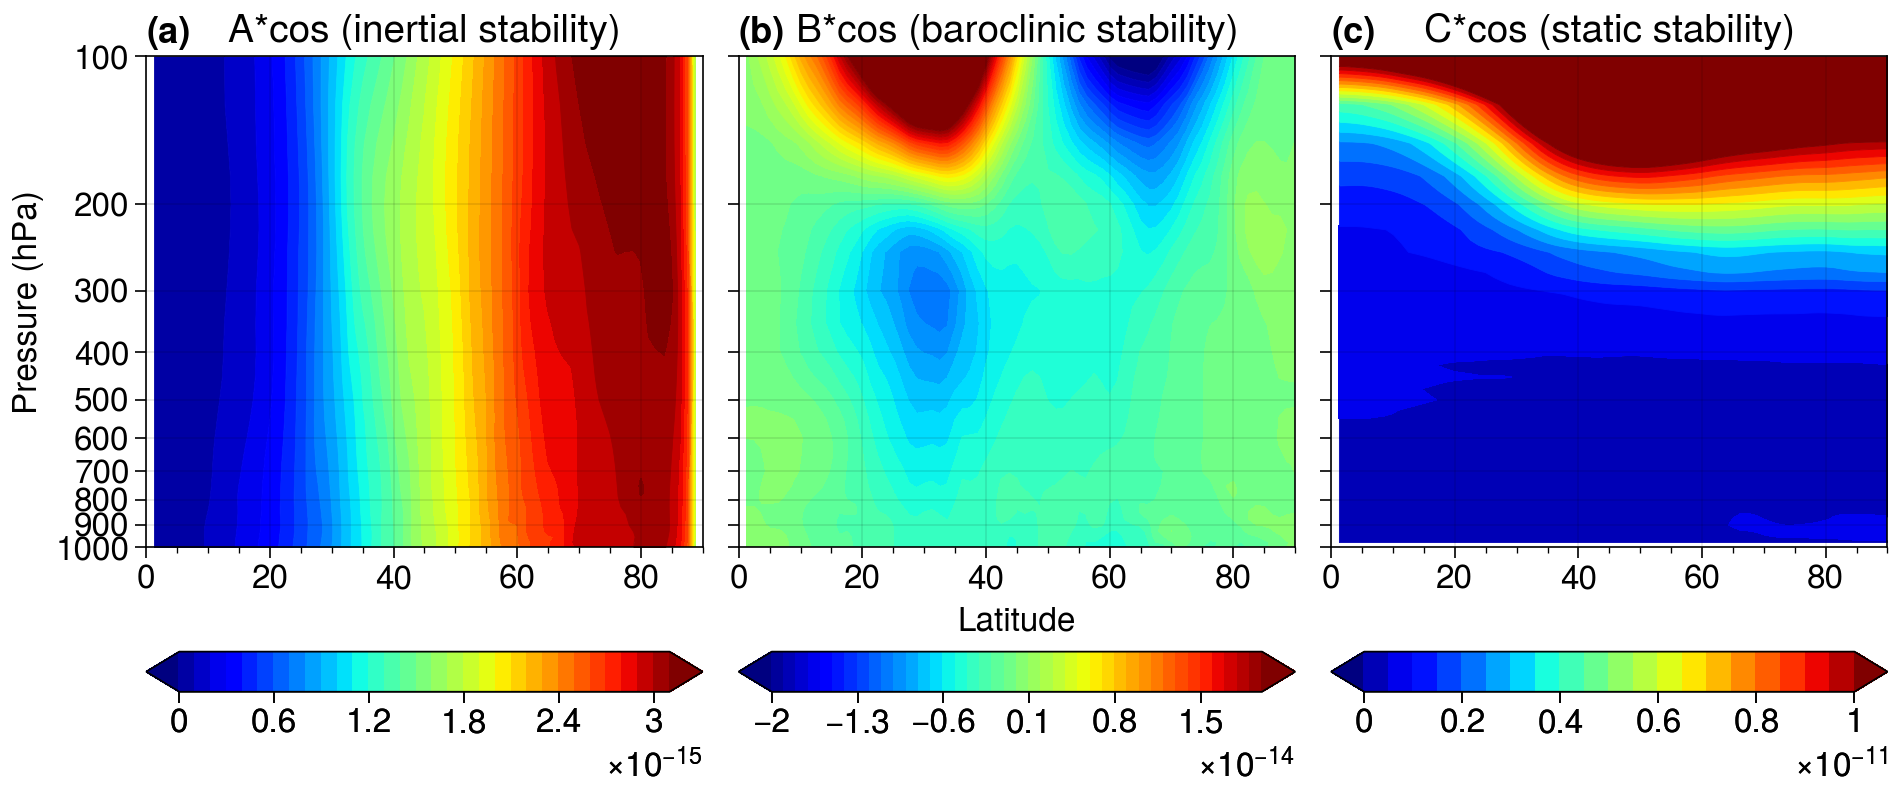

In [2]:
import proplot as pplt

fig, axes = pplt.subplots(nrows=1, ncols=3, figsize=(9.5,4), sharex=3, sharey=3)

fontsize = 14

ax = axes[0]
m = ax.contourf(Acoef*cosLat, levels=np.linspace(0, 3.1e-15, 32), cmap='jet', extend='both')
ax.set_title('A*cos (inertial stability)', fontsize=fontsize)
ax.colorbar(m, loc='b')
ax.set_yscale('log')

ax = axes[1]
m = ax.contourf(Bcoef*cosLat, levels=np.linspace(-2e-14, 2e-14, 41), cmap='jet', extend='both')
ax.set_title('B*cos (baroclinic stability)', fontsize=fontsize)
ax.colorbar(m, loc='b')

ax = axes[2]
m = ax.contourf(Ccoef*cosLat, levels=np.linspace(0, 1e-11, 21), cmap='jet', extend='both')
ax.set_title('C*cos (static stability)', fontsize=fontsize)
ax.colorbar(m, loc='b')
ax.set_yticks(np.arange(10000, 110000, 10000))
ax.set_yticklabels(np.arange(100, 1100, 100), fontsize=fontsize-2)

axes.format(abc='(a)', xlabel='Latitude', ylabel='Pressure (hPa)', xlim=[0, 90])

It is clear that the inertial stability ($A$) is high (low) at the polar (equatorial) region, and the static stability ($C$) is high (low) in the stratosphere (troposphere).  With these coefficients, we can invert the streamfunction given an idealized point forcing.  Here two sets of coefficients will be used in the inversion and the corresponding responses will be compared.

In [3]:
from xinvert.xinvert import invert_Eliassen

Fideal = ds.F_ideal  # load idealized point forcing

iParams = {
    'BCs'      : ['fixed', 'fixed'],
    'mxLoop'   : 1000,
    'tolerance': 1e-12,
}

mParams1 = {'Am':Acoef , 'Bm':Bcoef , 'Cm':Ccoef }
mParams2 = {'Am':Aideal, 'Bm':Bideal, 'Cm':Cideal}

sf1 = invert_Eliassen(Fideal, dims=['LEV','lat'], coords='z-lat', mParams=mParams1, iParams=iParams)
sf2 = invert_Eliassen(Fideal, dims=['LEV','lat'], coords='z-lat', mParams=mParams2, iParams=iParams)

{} loops 1000 and tolerance is 1.183260e-08
{} loops  610 and tolerance is 1.290015e-13


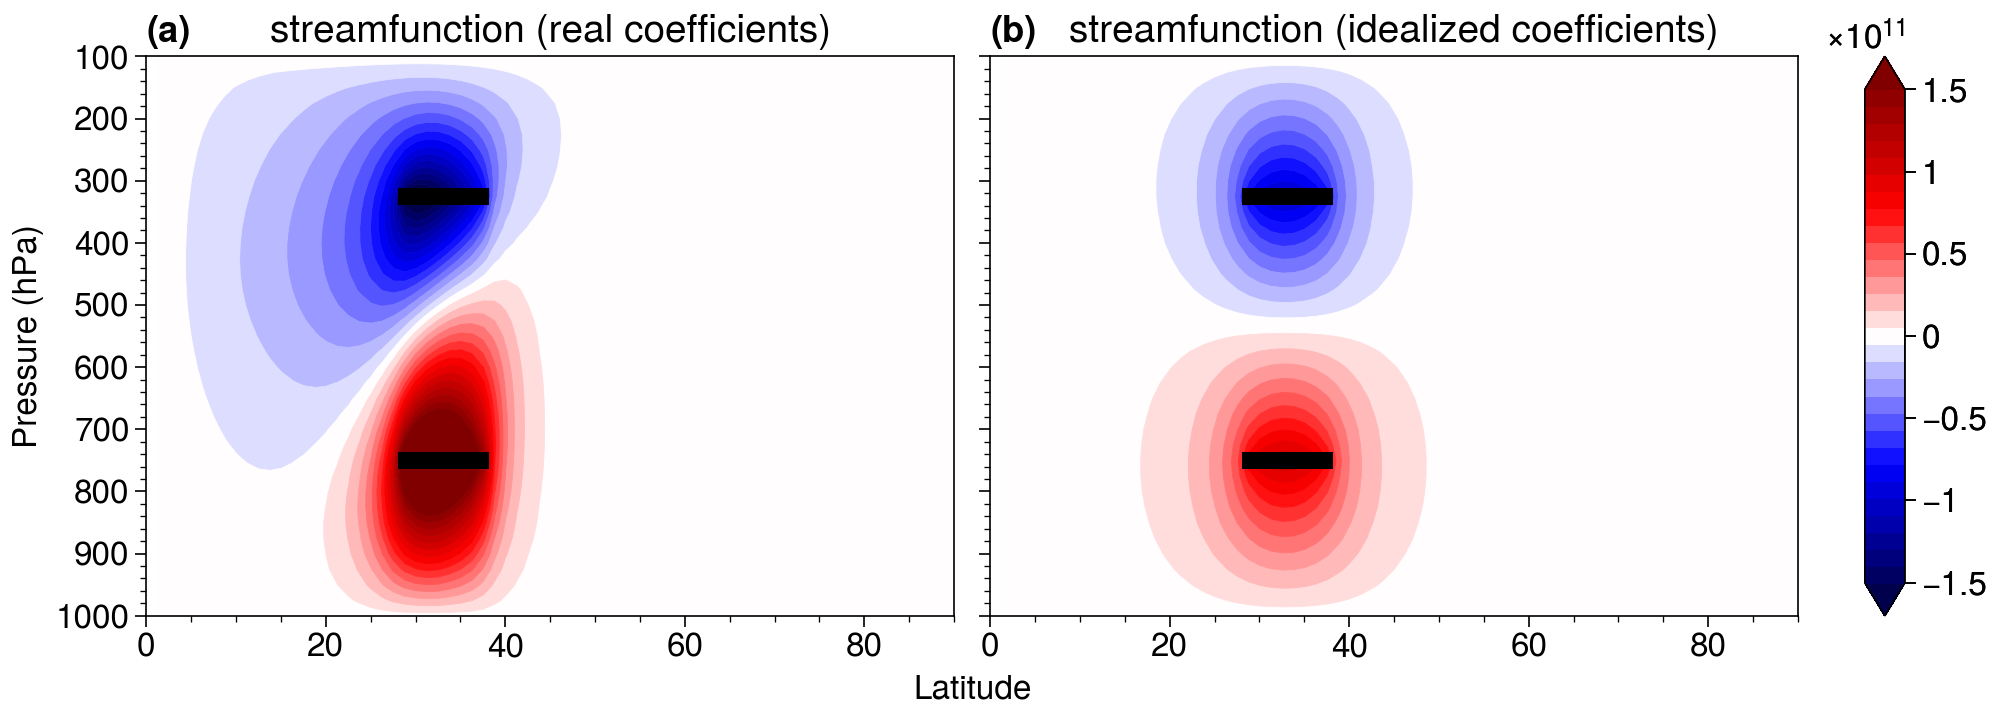

In [4]:
import proplot as pplt

fig, axes = pplt.subplots(nrows=1, ncols=2, figsize=(10,3.6), sharex=3, sharey=3)

fontsize = 14

ax = axes[0]
m = ax.contourf(sf1, levels=np.linspace(-1.5e11, 1.5e11, 30), cmap='seismic', extend='both')
ax.pcolormesh(Fideal.where(Fideal!=0), color='k')
ax.set_title('streamfunction (real coefficients)', fontsize=fontsize)

ax = axes[1]
m = ax.contourf(sf2, levels=np.linspace(-1.5e11, 1.5e11, 30), cmap='seismic', extend='both')
ax.pcolormesh(Fideal.where(Fideal!=0), color='k')
ax.set_title('streamfunction (idealized coefficients)', fontsize=fontsize)
ax.set_yticks(np.arange(10000, 110000, 10000))
ax.set_yticklabels(np.arange(100, 1100, 100), fontsize=fontsize-2)

fig.colorbar(m, loc='r', ticks=5e10, label='')
axes.format(abc='(a)', xlabel='Latitude', ylabel='Pressure (hPa)', xlim=[0, 90], ylim=[100000, 10000])

Here two point sources are specified.  One is set in the upper level and another is in the lower level.  It is known that the inertial (static) stability constrains the latitudinal (vertical) extent of the streamfunction response. As a result, the upper response are wider than the lower one, whereas the lower one is taller than the upper one (panel a).  If both coefficients are set to constants (panel b), both responses are of similar size.  The baroclinic stability $B$ controls the tilt of the response.  When it is set to zero, the vortex is barotropic and the response is not skrewed as that in panel a.

Now we use asymmetric eddy heat and momentum forcings and see the associated streamfunction response.

{} loops  168 and tolerance is 6.859964e-13


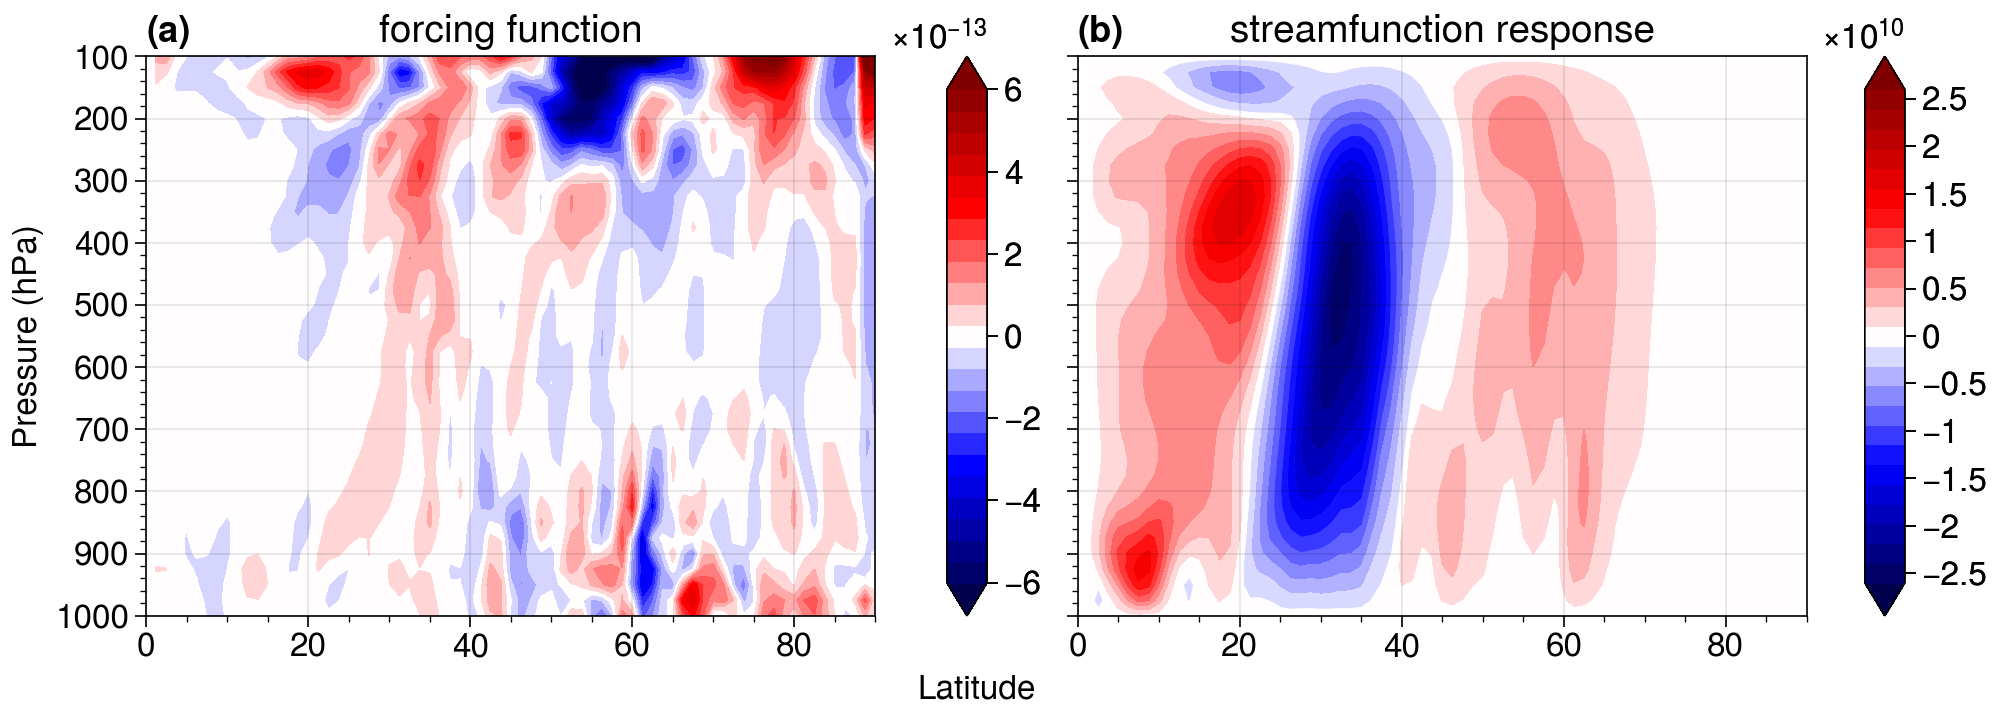

In [5]:
Force  = ds.EHF + ds.EAF  # load forcing representing asymmetric eddy heat and momentum forcings

iParams = {
    'BCs'      : ['fixed', 'fixed'],
    'mxLoop'   : 1000,
    'tolerance': 1e-12,
}

sfreal = invert_Eliassen(Force, dims=['LEV','lat'], coords='z-lat', mParams=mParams1, iParams=iParams)

fig, axes = pplt.subplots(nrows=1, ncols=2, figsize=(10,3.6), sharex=3, sharey=3)

fontsize = 14

ax = axes[0]
m = ax.contourf(Force, levels=np.linspace(-6e-13, 6e-13, 24), cmap='seismic', extend='both')
ax.set_title('forcing function', fontsize=fontsize)
ax.colorbar(m, loc='r', label='', ticks=2e-13)

ax = axes[1]
m = ax.contourf(sfreal, levels=np.linspace(-2.6e10, 2.6e10, 26), cmap='seismic', extend='both')
ax.set_title('streamfunction response', fontsize=fontsize)
ax.colorbar(m, loc='r', label='', ticks=5e9)
ax.set_yticks(np.arange(10000, 110000, 10000))
ax.set_yticklabels(np.arange(100, 1100, 100), fontsize=fontsize-2)

axes.format(abc='(a)', xlabel='Latitude', ylabel='Pressure (hPa)', xlim=[0, 90], ylim=[100000, 10000])

It is somewhat like the Hadley circulation in the atmosphere.  But note that we do not include the diabatic forcing, which is a dominant driving force for the meridional overturn in the atmosphere.

### 3.2 Secondary circulation in a tropical cyclone
We use the FNL data (1°resolution) to address this Tropical Cyclone case of Haima in 2004.  Note that the azimuthal average is already taken in a cylindrical coordinates that centered at the cyclone.  Also, coefficient $A$, $B$, and $C$, as well as the forcing $F$, are all pre-calculated.  So the inversion here is quite straightforward.

In [6]:
# load a snapshot as a radius-vertical 2D structure
ds = xr.open_dataset('../Data/TC2D.nc')
print(ds)

# load A, B, C, F
A = ds.Aa.load()
B = ds.Bb.load()
C = ds.Cc.load()
F = ds.faf.load()

<xarray.Dataset>
Dimensions:    (lat: 50, lev: 37)
Coordinates:
    time       datetime64[ns] ...
  * lev        (lev) float64 1e+05 9.75e+04 9.5e+04 ... 1.5e+04 1.25e+04 1e+04
  * lat        (lat) float32 -90.0 -89.7 -89.4 -89.1 ... -76.2 -75.9 -75.6 -75.3
    lon        float32 ...
Data variables: (12/114)
    sigma      (lev, lat) float32 ...
    gaz        (lev, lat) float32 ...
    gwm        (lev, lat) float32 ...
    spfh       (lev, lat) float32 ...
    lh         (lev, lat) float32 ...
    Qpt        (lev, lat) float32 ...
    ...         ...
    ws10       (lev, lat) float32 ...
    ws11       (lev, lat) float32 ...
    wstf       (lev, lat) float32 ...
    wsdf       (lev, lat) float32 ...
    wsbd       (lev, lat) float32 ...
    wsm        (lev, lat) float32 ...
Attributes:
    comment:  static stability using potential temperature
    storage:  99
    title:    grib
    undef:    9.999e+20
    pdef:     None


With the coefficients and forcing function, one can invert the secondary circulation streamfunction as:

In [11]:
from xinvert.xinvert import invert_Eliassen, cal_flow

iParams = {
    'BCs'      : ['fixed', 'fixed'],
    'mxLoop'   : 1000,
    'tolerance': 1e-12,
    'cal_flow' : True,
}

mParams = {'Am':A, 'Bm':B, 'Cm':C}

# use south pole as the center and latlon to fake the cylindrical coordinate for TC
# this leads to a minus sign of the streamfunction
sf = invert_Eliassen(F, coords='z-lat', dims=['lev','lat'], mParams=mParams, iParams=iParams)
v, w = cal_flow(-sf, dims=['lev','lat'], coords='z-lat', vtype='streamfunction')

{} loops 1000 and tolerance is 1.046592e-08


Finally, we can plot the streamfunction and associated velocity components.

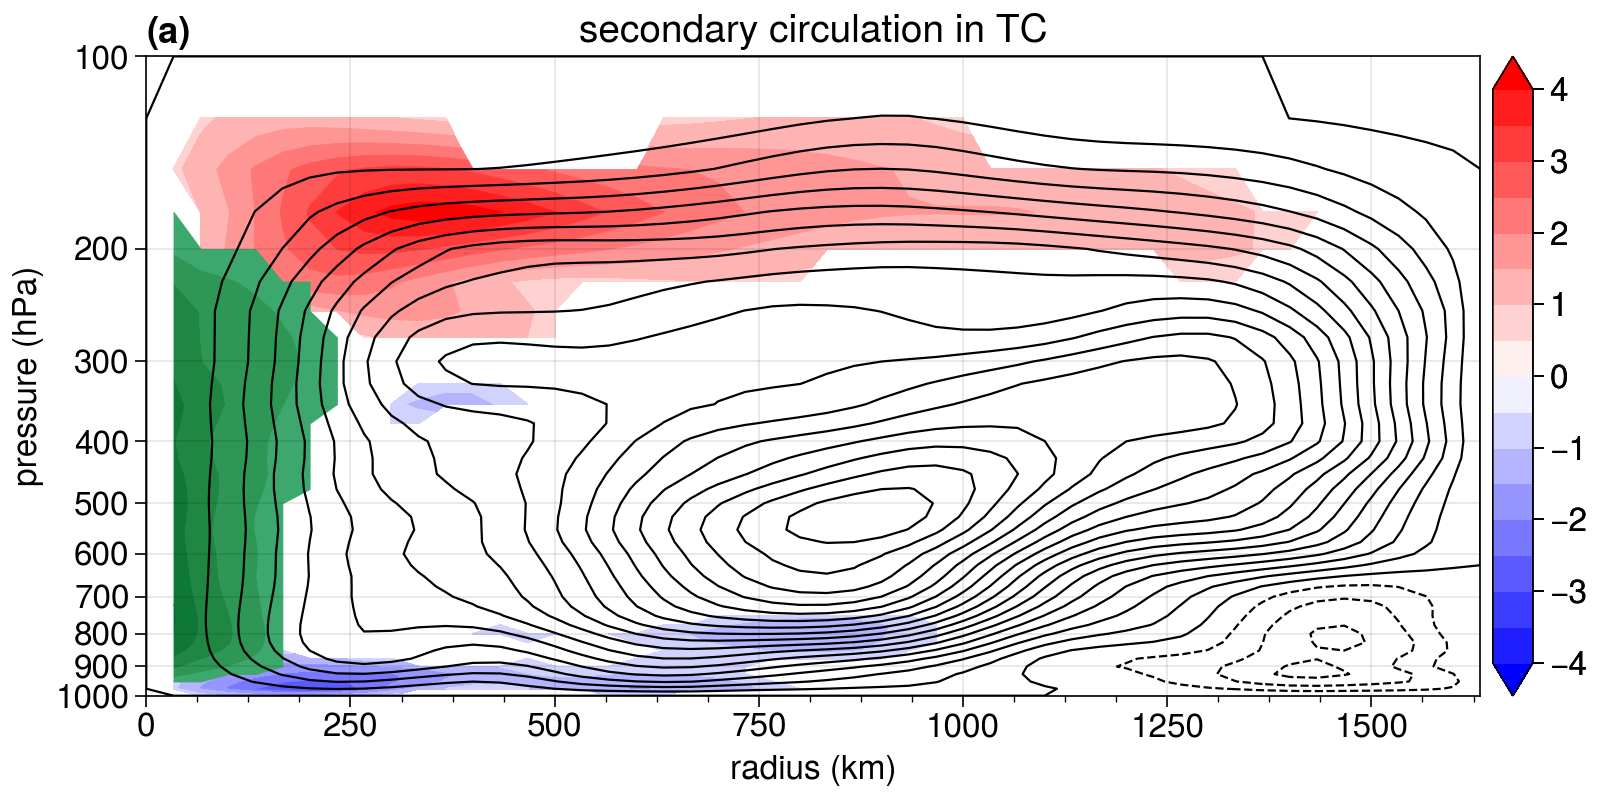

In [12]:
#%% plot wind and streamfunction
import proplot as pplt
import xarray as xr

fig, axes = pplt.subplots(nrows=1, ncols=1, figsize=(8, 4), sharex=3, sharey=3)

fontsize = 14

ax = axes[0]

tmp = sf.copy()
tmp['lev'] = tmp['lev'] / 100
m1 = ax.contour(tmp, levels=25, colors='k', lw=0.8)
tmp = v.copy()
tmp['lev'] = tmp['lev'] / 100
m2 = ax.contourf(xr.where(np.abs(tmp)<0.8, np.nan, tmp),
                 levels=np.linspace(-4, 4, 17), cmap='bwr', extend='both')
tmp = w.copy().load()
tmp[:, 0] = 0
tmp['lev'] = tmp['lev'] / 100
m3 = ax.contourf(xr.where(np.abs(tmp)<0.2, np.nan, tmp),
                   levels=np.linspace(-0.9, 0.9, 19), cmap='BuGn_r')
ax.set_yscale('log')

ax.set_title('secondary circulation in TC', fontsize=fontsize)
ax.colorbar(m2, loc='r', label='', ticks=1)
ax.set_xlabel('radius (km)')
ax.set_ylabel('pressure (hPa)')
ax.set_xticks(np.linspace(-90, -76.5, 7))
ax.set_yticks([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100])
ax.set_xticklabels(np.linspace(0, 1500, 7).astype('int'), fontsize=fontsize-2)
ax.set_yticklabels([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100],
                   fontsize=fontsize-2)

axes.format(abc='(a)', ytickminor=True)

Note that the strong <font color='blue'>infow (blue)</font> at lower levels, <font color='green'>upward draft (green)</font> near the center, and <font color='red'>outflow (red)</font> at upper levels are typical structure of TC's secondary circulation.  The downward motion at outer radii is not true here as the outer boundary is a closed one.  The air mass cannot go across the outer boundary and thus forced to descend.

---

### References
1. Eliassen, A., 1951: [Slow Thermally or Frictionally Controlled Meridional Circulation in a Circular Vortex](https://ui.adsabs.harvard.edu/abs/1951ApNr....5...19E/abstract). *Astrophys. Norv.*, **5**, 19-60.
2. Sundqvist, H., 1970: [Numerical simulation of the development of tropical cyclones with a ten-level model. Part I.](https://onlinelibrary.wiley.com/doi/10.1111/j.2153-3490.1970.tb00503.x). *Tellus*, **22**, 359-390.
3. Kuo, H.-L., 1956: [Forced and Free Meridional Circulation in the Atmosphere](https://journals.ametsoc.org/view/journals/atsc/13/6/1520-0469_1956_013_0561_fafmci_2_0_co_2.xml). *J. Meteor.*, **13**, 561-568.

